# Comparing the Estimation Methods

## Introduction

We conducted a simulation study demonstrating the performances of Meir et al. (2022) [1] and comparing it with that of Lee et al. (2018) [2]. 

The data was generated in the same way as in Usage Example section, i.e. $M=2$ competing events, $n=50,000$ observations, Z with 5 covariates and right censoring. 

Failure times were generated based on 

$$
\lambda_{j}(t|Z) = \frac{\exp(\alpha_{jt}+Z^{T}\beta_{j})}{1+\exp(\alpha_{jt}+Z^{T}\beta_{j})}
$$

with 

$\alpha_{1t} = -1 -0.3 \log(t)$, 

$\alpha_{2t} = -1.75 -0.15\log(t)$, $t=1,\ldots,d$,

$\beta_1 = (-\log 0.8, \log 3, \log 3, \log 2.5, \log 2)$, 

$\beta_{2} = (-\log 1, \log 3, \log 4, \log 3, \log 2)$. 

Censoring time for each observation was sampled from a discrete uniform distribution, i.e. $C_i \sim \mbox{Uniform}\{1,...,d+1\}$. 

We repeated this procedure for $d \in (15, 30, 45, 60, 100)$ and report the results in Meir et al. (2022) [1]. For each value of $d$, the results are based on 100 replications. 

We showed that both estimation methods perform very well in terms of bias and provide highly similar results in terms of point estimators and their standard errors. However, the computational running time of our approach is 1.5-3.5 times shorter depending on $d$, where the improvement factor increases as a function of $d$.

## Estimation Replications

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pydts.examples_utils.generate_simulations_data import generate_quick_start_df
import warnings
pd.set_option("display.max_rows", 500)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
real_coef_dict = {
    "alpha": {
        1: lambda t: -1 - 0.3 * np.log(t),
        2: lambda t: -1.75 - 0.15 * np.log(t)
    },
    "beta": {
        1: -np.log([0.8, 3, 3, 2.5, 2]),
        2: -np.log([1, 3, 4, 3, 2])
    }
}

n_patients = 50000
n_cov = 5

In [3]:
from pydts.fitters import repetitive_fitters
rep_dict, times_dict, counts_df = repetitive_fitters(rep=100, n_patients=n_patients, n_cov=n_cov, d_times=60,
                                                     j_events=2, pid_col='pid', test_size=0.25, verbose=0,
                                                     real_coef_dict=real_coef_dict, censoring_prob=0.8)


 82%|█████████████████████████████████       | 99/120 [2:29:29<31:42, 90.60s/it]

final: 100


## Comparing Standard Error of Lee et al. (2018) and Meir et al. (2022)

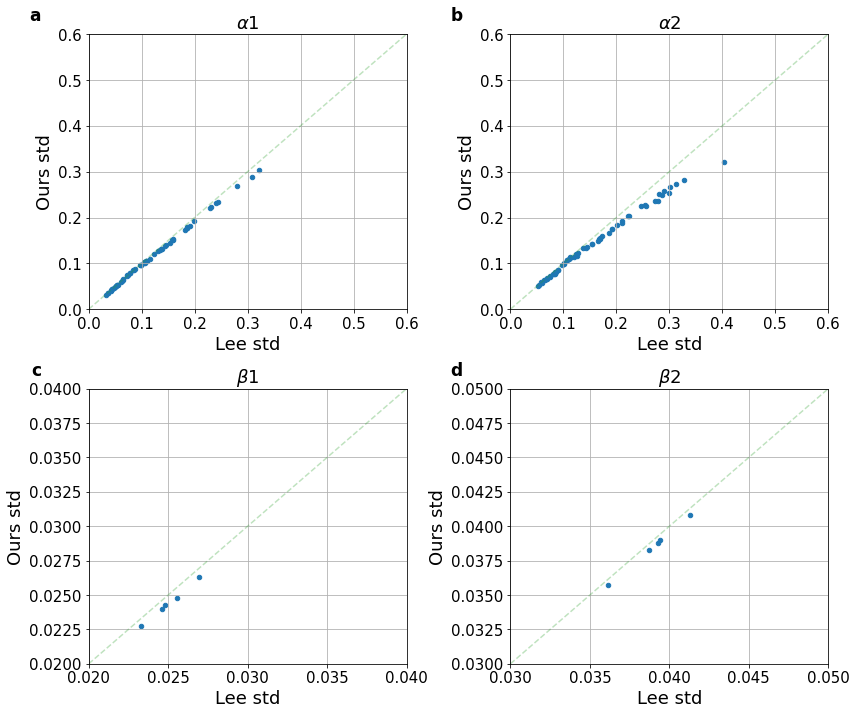

In [3]:
from pydts.examples_utils.plots import plot_reps_coef_std

new_res_dict = plot_reps_coef_std(rep_dict, True)

## Comparison of the Estimated Coefficients

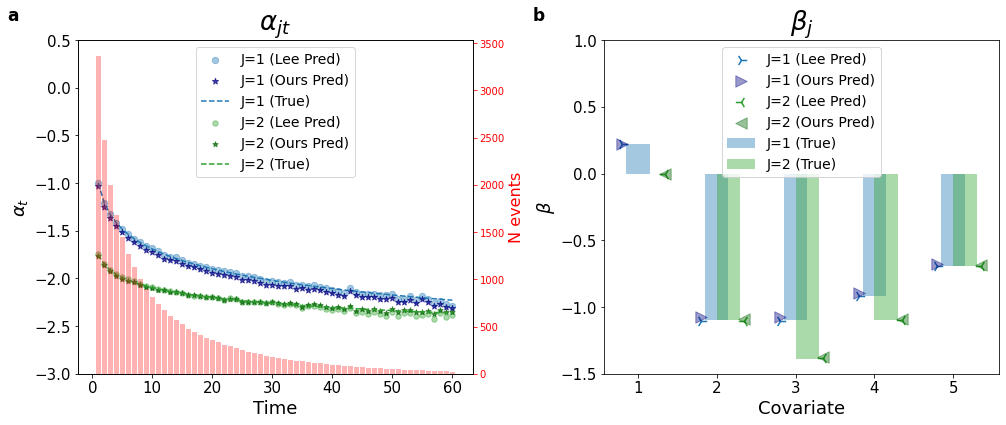

In [4]:
from pydts.examples_utils.plots import plot_models_coefficients
a = new_res_dict['alpha']
b = new_res_dict['beta']
times = [t+1 for t in list(a[1].reset_index().index)]
n_cov = 5
temp_c_df = counts_df.loc[[1,2]].groupby(['X']).sum().values.flatten().astype(int)
plot_models_coefficients(a, b, times, temp_c_df)

## Computational Time Comparison

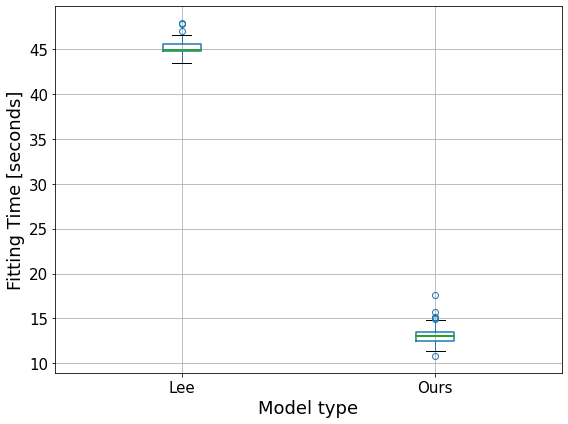

<AxesSubplot:xlabel='Model type', ylabel='Fitting Time [seconds]'>

In [5]:
from pydts.examples_utils.plots import plot_times

plot_times(times_dict)

## References

[1] Meir, Tomer\*, Gutman, Rom\*, and Gorfine, Malka, "PyDTS: A Python Package for Discrete-Time Survival Analysis with Competing Risks" (2022)

[2] Lee, Minjung and Feuer, Eric J. and Fine, Jason P., "On the analysis of discrete time competing risks data", Biometrics (2018) doi: 10.1111/biom.12881